# Part I: Importing Libraries and Data

In [418]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Enable inline plotting
%matplotlib inline
plt.style.use('ggplot')

In [451]:
pull_req_data = pd.read_csv('./preprocessed_data_v4.csv')

In [452]:
pull_req_data.head(n=10)

,slug,gh_team_size,git_num_commits,gh_num_issue_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,churn,...,Id,state,merged,merge_commit_sha,delta_mins_merge,delta_mins_close,updated_at,open_issues_count,watchers_count,subscribers_count
0,getnikola/nikola,10,1,1,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
1,getnikola/nikola,10,1,2,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
2,getnikola/nikola,11,2,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
3,getnikola/nikola,12,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
4,getnikola/nikola,12,1,2,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
5,getnikola/nikola,37,6,1,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
6,getnikola/nikola,46,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
7,getnikola/nikola,81,1,0,0,0,0,2,0,2,...,32689,closed,True,2818ec7bb3376eeca9a60c60b9986a183bf65ff9,29.7333,29.7333,2016-01-01,91,1055,73
8,magnumripper/JohnTheRipper,8,1,0,5,0,0,22,18,40,...,31939,closed,False,0f78ca884776a6d1b7c2beb9a2116c5511379eef,-1.0000,143.9330,2016-01-01,211,651,78
9,magnumripper/JohnTheRipper,16,1,2,5,0,0,22,18,40,...,31939,closed,False,0f78ca884776a6d1b7c2beb9a2116c5511379eef,-1.0000,143.9330,2016-01-01,211,651,78


In [453]:
pull_req_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36660 entries, 0 to 36659
Data columns (total 40 columns):
slug                           36660 non-null object
gh_team_size                   36660 non-null int64
git_num_commits                36660 non-null int64
gh_num_issue_comments          36660 non-null int64
num_commit_comments            36660 non-null int64
pull_req_comments              36660 non-null int64
gh_num_pr_comments             36660 non-null int64
additions                      36660 non-null int64
deletions                      36660 non-null int64
churn                          36660 non-null int64
changed_files                  36660 non-null int64
gh_src_churn                   36660 non-null int64
gh_test_churn                  36660 non-null int64
gh_files_added                 36660 non-null int64
gh_files_deleted               36660 non-null int64
gh_files_modified              36660 non-null int64
gh_tests_added                 36660 non-null int64
gh_tes

In [454]:
pull_req_data.shape

(36660, 40)

In [455]:
pull_req_data['updated_at'] = pd.to_datetime(pull_req_data['updated_at'])
pull_req_data = pull_req_data.sort_values(by='updated_at')

# Part II: Basic Statistics

In [456]:
pull_req_data.describe()

,gh_team_size,git_num_commits,gh_num_issue_comments,num_commit_comments,pull_req_comments,gh_num_pr_comments,additions,deletions,churn,changed_files,...,title_len,desc_len,git_num_committers,Id,merged,delta_mins_merge,delta_mins_close,open_issues_count,watchers_count,subscribers_count
count,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000,...,36660.000000,36660.000000,36660.000000,36660.000000,36660,36660.000000,36660.000000,36660.000000,36660.000000,36660.000000
mean,25.192908,1.717976,0.725041,3.349864,1.282051,0.658347,349.096154,196.929542,546.025696,16.103737,...,41.748472,283.264239,1.166585,42127.901118,0.698718,376.898921,491.228152,240.539798,1321.610229,112.099127
std,18.414175,2.986504,1.929302,6.354453,6.137098,5.808495,2142.993608,1926.907100,3776.365728,132.722241,...,18.473127,626.966244,0.398094,22269.705614,0.458821,473.073473,487.147591,198.522400,1460.249673,98.744949
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,1.000000,False,-1.000000,-1.000000,17.000000,7.000000,13.000000
25%,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,7.000000,1.000000,...,27.000000,15.000000,1.000000,31198.000000,0,-1.000000,40.800000,99.000000,212.000000,48.000000
50%,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,4.000000,28.000000,2.000000,...,40.000000,101.000000,1.000000,38912.000000,1,109.617000,302.367000,171.000000,767.000000,85.000000
75%,39.000000,1.000000,1.000000,4.000000,0.000000,0.000000,94.000000,22.000000,133.000000,5.000000,...,54.000000,292.000000,1.000000,59254.000000,1,747.167000,938.100000,324.000000,2217.000000,138.000000
max,89.000000,151.000000,39.000000,136.000000,327.000000,661.000000,116015.000000,43469.000000,159484.000000,2573.000000,...,180.000000,12687.000000,6.000000,81785.000000,True,1439.200000,1439.200000,1818.000000,20119.000000,1033.000000


In [457]:
total_pull_req = len(pull_req_data)
pull_reqs_accepted = len(pull_req_data[pull_req_data["merged"] == True])
print 'Total pull requests in our given data = ', total_pull_req
print 'Accepted pull requests = ', pull_reqs_accepted
print 'Percentage of Accepted pull requests = %.2f' % ((float(pull_reqs_accepted)/float(total_pull_req)) * 100)
#perc_accepted = len(pulllen(pull_req_data[pull_req_data["merged"] == True])

Total pull requests in our given data =  36660
Accepted pull requests =  25615
Percentage of Accepted pull requests = 69.87


# Preprocessing (Split Target Feature and Columns)

In [458]:
def convertToNonNegatives(x):
    return round(x, -1)

In [459]:
pull_req_data['delta_mins_merge'] = pull_req_data['delta_mins_merge'].apply(convertToNonNegatives)
pull_req_data['delta_mins_close'] = pull_req_data['delta_mins_close'].apply(convertToNonNegatives)

In [460]:
pull_req_data['delta_mins_merge'].describe()

count    36660.000000
mean       377.166394
std        472.785774
min         -0.000000
25%         -0.000000
50%        110.000000
75%        750.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

In [461]:
# This will be our target variable
Y = np.array(pull_req_data['merged'].apply(int))
Y
#dropped_features = pull_req_data.drop(['Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
#dropped_features

array([1, 0, 1, ..., 0, 0, 0])

In [462]:
# Drop these features because they are redundant / we dont need to feed them in the ML model
# Note here:- We are removing delta_mins_merge and delta_mins_close because from the user's perspective
# They are not controllable
dropped_features = pull_req_data.drop(['updated_at', 'delta_mins_merge', 'delta_mins_close', 'slug', 'Id', 'state', 'merged', 'merge_commit_sha'], axis=1)
X = dropped_features.as_matrix().astype(np.float)
X.shape

(36660, 32)

In [463]:
features = dropped_features.columns
pprint.pprint(features)

Index([u'gh_team_size', u'git_num_commits', u'gh_num_issue_comments',
       u'num_commit_comments', u'pull_req_comments', u'gh_num_pr_comments',
       u'additions', u'deletions', u'churn', u'changed_files', u'gh_src_churn',
       u'gh_test_churn', u'gh_files_added', u'gh_files_deleted',
       u'gh_files_modified', u'gh_tests_added', u'gh_tests_deleted',
       u'gh_src_files', u'gh_doc_files', u'gh_other_files',
       u'gh_commits_on_files_touched', u'gh_sloc', u'gh_test_lines_per_kloc',
       u'gh_test_cases_per_kloc', u'gh_asserts_cases_per_kloc',
       u'gh_by_core_team_member', u'title_len', u'desc_len',
       u'git_num_committers', u'open_issues_count', u'watchers_count',
       u'subscribers_count'],
      dtype='object')


# Merge time statistics

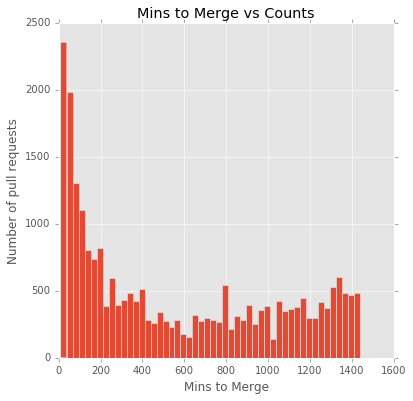

In [464]:
plt.rcParams["figure.figsize"] = [6, 6]
data_to_graph = (pull_req_data[pull_req_data['delta_mins_merge'] != 0])['delta_mins_merge']
plt.hist(data_to_graph, bins=50)
plt.title("Mins to Merge vs Counts")
plt.xlabel("Mins to Merge")
plt.ylabel("Number of pull requests")
plt.show()

In [465]:
total_true_pull = len(pull_req_data[pull_req_data['delta_mins_merge'] != 0]['delta_mins_merge'])
accepted = pull_req_data[pull_req_data['delta_mins_merge'] != 0]['delta_mins_merge']
less_than_8 = len(accepted[accepted <= 480])
#percentage = (total_pull_req) / less_than_8
#print 'perce = %.2f' % percentage
print less_than_8
print total_true_pull
print 'perc = %.2f' % (float(less_than_8) / total_true_pull)

13096
24579
perc = 0.53


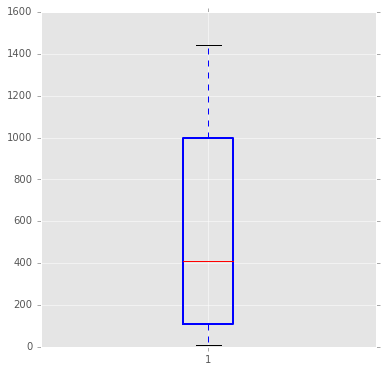

In [466]:
#data_to_graph
bp = plt.boxplot(np.array(data_to_graph))
#bp['boxes'].set( color='#7570b3', linewidth=2)
#bp['boxes'].set( facecolor = '#1b9e77' )
#bp.show()
#bp['boxes']
plt.setp(bp['boxes'], color='Blue', linewidth=2)
plt.show()

In [444]:
data_to_graph.describe()

count    24579.000000
mean       562.550144
std        478.650198
min         10.000000
25%        110.000000
50%        410.000000
75%       1000.000000
max       1440.000000
Name: delta_mins_merge, dtype: float64

# Part III: Feature Selection

In [467]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import datasets
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cross_validation import cross_val_score, ShuffleSplit
import pprint

# Trees Ensemble Feature Selection

In [468]:
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=1000,
                              random_state=0)

forest.fit(X, Y)
importances = forest.feature_importances_
#print importances
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

scores = []
names = dropped_features.columns
# Print the feature ranking
#print 'Names = ', names
#print("Feature ranking:")
feature_labels = []
for f in range(X.shape[1]):
    #print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    scores.append((importances[indices[f]], names[indices[f]]))
    feature_labels.append(names[indices[f]])

pprint.pprint(sorted(scores, reverse=True))



[(0.089598604859006961, 'subscribers_count'),
 (0.086112826932330855, 'watchers_count'),
 (0.084326535942179995, 'open_issues_count'),
 (0.083153338013766745, 'num_commit_comments'),
 (0.076038080908013728, 'desc_len'),
 (0.072888189171256043, 'title_len'),
 (0.068483902491859081, 'additions'),
 (0.063234908150733862, 'churn'),
 (0.058291201200424983, 'changed_files'),
 (0.057902418793349411, 'deletions'),
 (0.035190558253456572, 'pull_req_comments'),
 (0.021746631298147419, 'gh_team_size'),
 (0.02165813182372666, 'gh_sloc'),
 (0.017460302574254211, 'gh_test_lines_per_kloc'),
 (0.017230467087820441, 'gh_asserts_cases_per_kloc'),
 (0.017097738892042393, 'gh_test_cases_per_kloc'),
 (0.014953748388316012, 'gh_commits_on_files_touched'),
 (0.01234660997263866, 'gh_src_churn'),
 (0.011772201411522449, 'gh_src_files'),
 (0.011761224652985142, 'gh_files_modified'),
 (0.010224089331213803, 'gh_num_issue_comments'),
 (0.010070652932408166, 'gh_test_churn'),
 (0.0088495295124124979, 'gh_other_fi

In [447]:
print X.shape[1]
print len(indices)
print len(names)

32
32
32


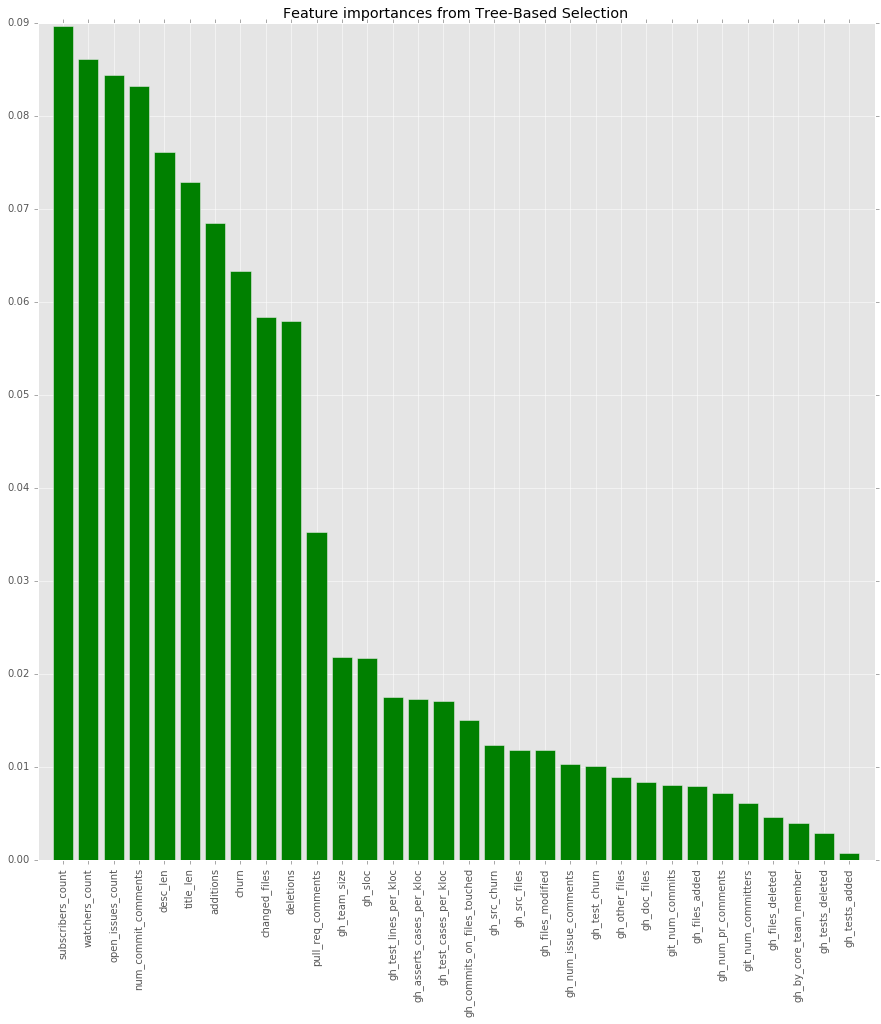

In [469]:
# Plot the feature importances of the forest
#feature_labels[0] = 'pull_req_comments'
plt.rcParams["figure.figsize"] = [15, 15]
plt.figure()
plt.title("Feature importances from Tree-Based Selection")
plt.bar(range(X.shape[1]), 
         importances[indices],
        color="g", align="center")
        #yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), feature_labels, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

In [470]:
rand_for = RandomForestRegressor(n_estimators=50, max_depth=4)
scores = []
names = dropped_features.columns
for i in range(X.shape[1]):
    score = cross_val_score(rand_for, X[:, i:i+1], Y, scoring="r2",
                              cv=ShuffleSplit(len(X), 3, .3))
    scores.append((round(np.mean(score), 3), names[i]))
pprint.pprint(sorted(scores, reverse=True))

[(0.216, 'open_issues_count'),
 (0.18, 'watchers_count'),
 (0.174, 'subscribers_count'),
 (0.067, 'num_commit_comments'),
 (0.056, 'desc_len'),
 (0.041, 'additions'),
 (0.034, 'churn'),
 (0.022, 'title_len'),
 (0.019, 'changed_files'),
 (0.016, 'deletions'),
 (0.008, 'gh_test_lines_per_kloc'),
 (0.007, 'gh_asserts_cases_per_kloc'),
 (0.005, 'pull_req_comments'),
 (0.005, 'gh_sloc'),
 (0.004, 'gh_test_cases_per_kloc'),
 (0.004, 'gh_team_size'),
 (-0.0, 'git_num_committers'),
 (0.0, 'git_num_commits'),
 (0.0, 'gh_other_files'),
 (-0.0, 'gh_num_issue_comments'),
 (-0.0, 'gh_files_modified'),
 (-0.0, 'gh_files_deleted'),
 (-0.0, 'gh_files_added'),
 (-0.0, 'gh_doc_files'),
 (0.0, 'gh_by_core_team_member'),
 (-0.001, 'gh_tests_deleted'),
 (-0.001, 'gh_tests_added'),
 (-0.001, 'gh_test_churn'),
 (-0.001, 'gh_src_files'),
 (-0.001, 'gh_src_churn'),
 (-0.001, 'gh_num_pr_comments'),
 (-0.001, 'gh_commits_on_files_touched')]


# Univariate Feature Selection

In [471]:
ch2 = SelectKBest(chi2,"all")
X_train = ch2.fit_transform(X, Y)
top_ranked_features = sorted(enumerate(ch2.scores_),key=lambda x:x[1], reverse=True)[:32]
for index,(position,score) in enumerate(top_ranked_features):
    print '%d) %s - %f' % (index+1, names[position], score)
#top_ranked_features

1) churn - 9722839.856675
2) additions - 6990201.834360
3) gh_sloc - 4982377.704276
4) deletions - 2795580.356458
5) watchers_count - 1423196.312833
6) desc_len - 581536.774362
7) changed_files - 301911.328934
8) open_issues_count - 134025.061524
9) subscribers_count - 54104.385682
10) gh_test_lines_per_kloc - 12038.491511
11) num_commit_comments - 10706.377954
12) gh_src_churn - 1421.704835
13) gh_test_churn - 1077.506654
14) gh_commits_on_files_touched - 721.131568
15) title_len - 591.780988
16) gh_doc_files - 551.982914
17) gh_test_cases_per_kloc - 407.560606
18) pull_req_comments - 368.618481
19) gh_files_modified - 197.415105
20) gh_tests_deleted - 94.872004
21) gh_asserts_cases_per_kloc - 46.268621
22) gh_num_pr_comments - 36.148987
23) git_num_commits - 27.239516
24) gh_team_size - 26.519226
25) gh_tests_added - 14.354717
26) gh_src_files - 11.262469
27) gh_files_added - 4.940805
28) gh_other_files - 4.866025
29) gh_files_deleted - 3.496616
30) gh_by_core_team_member - 0.852388


## Recursive Feature Elimination

In [472]:
# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()
top_n_features = 10
# create the RFE model and select top 10 attributes
rfe = RFE(model, top_n_features)
rfe = rfe.fit(X, Y)
# summarize the selection of the attributes
#print(rfe.support_)
#print(rfe.ranking_)

scores = []
for feature_name,rank in zip(names, rfe.ranking_):
    scores.append((feature_name, rank))

pprint.pprint(sorted(scores, key=lambda x:x[1]))


[('gh_team_size', 1),
 ('git_num_commits', 1),
 ('gh_num_issue_comments', 1),
 ('num_commit_comments', 1),
 ('pull_req_comments', 1),
 ('gh_tests_added', 1),
 ('gh_doc_files', 1),
 ('gh_by_core_team_member', 1),
 ('title_len', 1),
 ('git_num_committers', 1),
 ('subscribers_count', 2),
 ('changed_files', 3),
 ('gh_files_modified', 4),
 ('gh_src_files', 5),
 ('gh_files_deleted', 6),
 ('open_issues_count', 7),
 ('gh_files_added', 8),
 ('gh_other_files', 9),
 ('gh_num_pr_comments', 10),
 ('gh_commits_on_files_touched', 11),
 ('watchers_count', 12),
 ('desc_len', 13),
 ('additions', 14),
 ('deletions', 15),
 ('gh_test_churn', 16),
 ('gh_asserts_cases_per_kloc', 17),
 ('gh_test_lines_per_kloc', 18),
 ('gh_tests_deleted', 19),
 ('gh_test_cases_per_kloc', 20),
 ('churn', 21),
 ('gh_src_churn', 22),
 ('gh_sloc', 23)]


# Part IV: Modelling Phase

In [508]:
# Take only the representative features using previous phase
features = [
'num_commit_comments',
'desc_len',
'additions',
'churn',
'title_len',
'changed_files',
'deletions',
# 'gh_test_lines_per_kloc',
'gh_sloc',
'open_issues_count',
'watchers_count',
'subscribers_count',
'pull_req_comments',
# 'gh_team_size'
]
# 'gh_asserts_cases_per_kloc',
# 'pull_req_comments',
# 'gh_test_cases_per_kloc',
# 'gh_description_complexity',
# 'gh_team_size']
X_new = dropped_features[features]#.as_matrix().astype(np.float)
X_new.shape


(36660, 12)

In [509]:
X_train = X_new.head(29332)
X_test = X_new.tail(len(X_new) - 29333)

y_train = Y[0:29332]
y_test = Y[29333:]

In [510]:
#X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size = 0.20)
print X_train.shape
print y_train.shape

print X_test.shape
print y_test.shape

(29332, 12)
(29332,)
(7327, 12)
(7327,)


In [511]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_predict
from sklearn.learning_curve import validation_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [512]:
# fit a logistic regression model to the data
model = LogisticRegression()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.48      0.06      0.11      3276
          1       0.55      0.94      0.70      4051

avg / total       0.52      0.55      0.44      7327

[[ 211 3065]
 [ 231 3820]]


0.55015695373276918

### k-Nearest Neighbor

In [513]:
# fit a logistic regression model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          0       0.66      0.32      0.43      3276
          1       0.61      0.87      0.72      4051

avg / total       0.63      0.62      0.59      7327

[[1040 2236]
 [ 545 3506]]


0.62044492971202403

### Decision Trees

In [514]:
# fit a logistic regression model to the data
model = DecisionTreeClassifier(max_depth=40,criterion="entropy", min_samples_split=2)
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=40,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
             precision    recall  f1-score   support

          0       0.64      0.36      0.46      3276
          1       0.62      0.84      0.71      4051

avg / total       0.63      0.62      0.60      7327

[[1165 2111]
 [ 642 3409]]


0.62426641190118737

### Random Forests

In [515]:
clf_random_forest = RandomForestClassifier()
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.77      0.36      0.49      3276
          1       0.64      0.91      0.75      4051

avg / total       0.70      0.67      0.64      7327

[[1186 2090]
 [ 349 3702]]


0.66712160502251949

### Adaboost

In [516]:
clf_random_forest = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                             algorithm="SAMME",
                             n_estimators=600)
clf_random_forest.fit(X_train, y_train)

# make predictions
expected = Y
predicted = clf_random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

             precision    recall  f1-score   support

          0       0.83      0.23      0.36      3276
          1       0.61      0.96      0.74      4051

avg / total       0.71      0.63      0.57      7327

[[ 742 2534]
 [ 148 3903]]


0.63395659888085165

In [517]:
from sklearn import svm

### SVM 

In [518]:
# fit a logistic regression model to the data
model = svm.SVC()
model.fit(X_train, y_train)
print(model)

# make predictions
expected = Y
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

accuracy_score(y_test, predicted)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
             precision    recall  f1-score   support

          0       1.00      0.00      0.01      3276
          1       0.55      1.00      0.71      4051

avg / total       0.75      0.55      0.40      7327

[[   9 3267]
 [   0 4051]]


0.55411491742868846

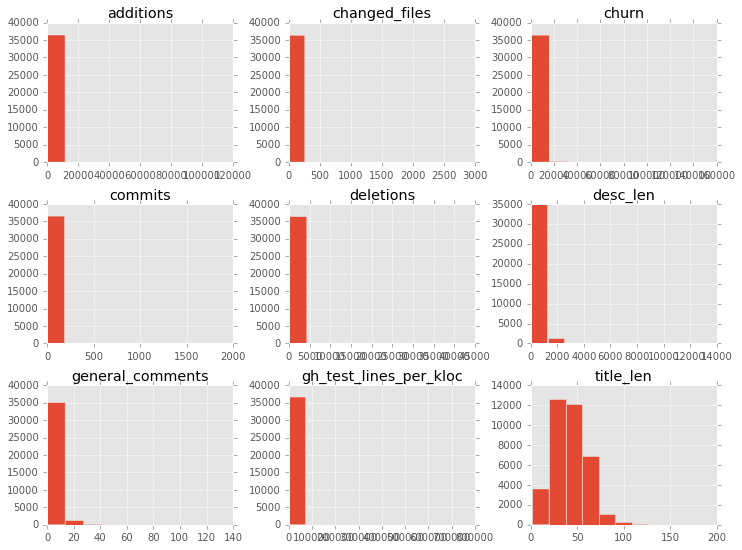

In [328]:
plt.rcParams["figure.figsize"] = [12, 9]
dropped_features[features].hist()
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1890cae90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x145d33f90>]], dtype=object)

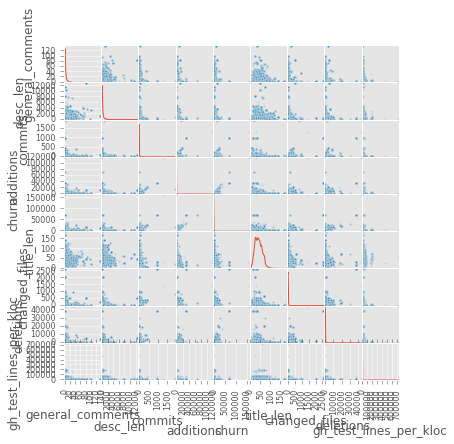

In [329]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dropped_features[features], alpha=0.2, figsize=(6, 6), diagonal='kde')

In [336]:
pull_req_data[pull_req_data['merged'] == False][["title_len", "desc_len"]].describe()

,title_len,desc_len
count,11046.000000,11046.000000
mean,42.998189,385.318124
std,19.877707,821.803375
min,2.000000,0.000000
25%,29.000000,52.000000
50%,41.000000,156.500000
75%,55.000000,407.000000
max,168.000000,12687.000000


In [337]:
pull_req_data[pull_req_data['merged'] == True][["title_len", "desc_len"]].describe()

,title_len,desc_len
count,25619.000000,25619.000000
mean,41.208322,239.270034
std,17.805602,514.741231
min,3.000000,0.000000
25%,27.000000,10.000000
50%,40.000000,84.000000
75%,54.000000,241.000000
max,180.000000,11324.000000


In [341]:
pull_req_data[pull_req_data['merged'] == False][["commits", "additions", "deletions"]].describe()

,commits,additions,deletions
count,11046.000000,11046.000000,11046.000000
mean,13.827268,741.944324,383.515390
std,87.508245,3679.574488,3219.612297
min,0.000000,0.000000,0.000000
25%,1.000000,5.000000,1.000000
50%,2.000000,29.000000,3.000000
75%,3.000000,128.000000,20.000000
max,1887.000000,116015.000000,43469.000000


In [340]:
pull_req_data[pull_req_data['merged'] == True][["commits", "additions", "deletions"]].describe()

,commits,additions,deletions
count,25619.000000,25619.000000,25619.000000
mean,2.640501,179.686131,116.469534
std,5.515381,799.444407,906.949928
min,1.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000
50%,1.000000,17.000000,4.000000
75%,2.000000,79.000000,22.000000
max,158.000000,28285.000000,29888.000000
